<a href="https://colab.research.google.com/github/LanqingDu/Predictive_prescriptive/blob/main/03_R_Intro.ipynb" target="_blank">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# **Getting Started with R Language**



> **Instructor:** Dr. Lanqing Du  
> **Acknowledgement:** Based on R user guide content.  
> **Objective:** Introduction to R.  
> **Instructions:** You can preview the **Table of Contents** from the side bar.

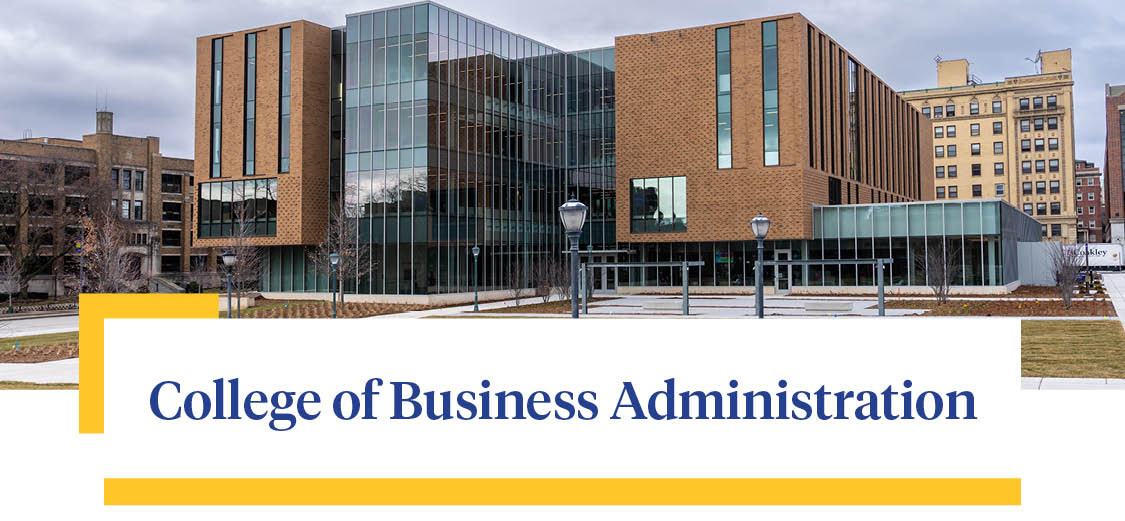
---


## [1. TO-DO LIST:](#whyCoding)

1. Load the `ButlerWithDeliveries` data file.
2. Generate means, standard deviaitons, and histograms for vairables (columns) except the `Assignment` variable.
3. Generate histograms for all variables (except the `Assignment`).
4. Generate scatterplots of `Time` vs `Other variables` (except the `Assignment`).



## [2. Code Breakdown:](#howCoding)

In [ ]:
# ================================
# Step-1: Load Required Package
# ================================
# tidyverse is a collection of R packages for data manipulation (dplyr) and visualization (ggplot2).

# install.packages("tidyverse") # Install packages if needed
library(tidyverse)
# if loading .xlsx file
# library(readxl)

In [ ]:
# ================================
# Step-2: Upload data
# ================================

# If Python:
#   from google.colab import files
#   uploaded = files.upload()

# If R:
#   Mannually upload to the Colab: Files -> Upload

In [10]:
# ================================
# Step-3: Read in data file
# ================================
# read.csv(file, header = TRUE, sep = ",")
#   file: name/path of the CSV file
#   header = TRUE (default): first row has column names
#   sep = "," (default): file is comma-separated

# read.xlsx(file, sheet = 1, colNames = TRUE)
#   file: name/path of the Excel file (.xlsx)
#   sheet = 1 (default): index or name of the sheet to read
#        e.g., 1 (first sheet) or "Sheet1" (sheet name)
#   colNames = TRUE (default): first row is treated as column names
#   skipEmptyRows = TRUE (default): automatically removes empty rows
#   skipEmptyCols = TRUE (default): automatically removes empty columns

# head(x, n = 6)
#   x: the object to inspect (e.g., a data frame, tibble, vector, or matrix)
#   n = 6 (default): number of rows (or elements) to display from the start
#
# Returns: the first n rows/elements of the object

# df <- read.csv("xxx.csv")
df <- read_excel("ButlerWithDeliveries.xlsx")

head(df)

# select(-Assignment): selects all columns EXCEPT "Assignment"
# The pipe operator %>% takes the output of the expression on its left and "pipes" it as the first argument to the function on its right.
df <- df %>% select(-Assignment)
head(df)

Assignment,Miles,Deliveries,Time
<dbl>,<dbl>,<dbl>,<dbl>
1,100,4,9.3
2,50,3,4.8
3,100,4,8.9
4,100,2,6.5
5,50,2,4.2
6,80,2,6.2


Miles,Deliveries,Time
<dbl>,<dbl>,<dbl>
100,4,9.3
50,3,4.8
100,4,8.9
100,2,6.5
50,2,4.2
80,2,6.2


In [11]:
# ================================
# Step-4: Descriptive statistics
# ================================
# sapply(X, FUN, ...):
#   X = dataframe
#   FUN = function (mean, sd)
#   na.rm = TRUE (default) removes missing values before calculation
#
# Returns: a simplified result (usually a vector or matrix) after applying FUN to each element/column of X

means <- sapply(df, mean, na.rm = TRUE)
sds   <- sapply(df, sd, na.rm = TRUE)

# Convert the named vector to a data frame for tabular display
means_table <- data.frame(
  Variable = names(means),  # column names
  Mean = as.numeric(means)  # mean values
)

sds_table <- data.frame(
  Variable = names(sds),  # column names
  Mean = as.numeric(sds)  # mean values
)

# Print the mean_table
print(means_table)

# Add a blank line for spacing
cat("\n")

# Print the sds_table
print(sds_table)

    Variable      Mean
1      Miles 70.716667
2 Deliveries  3.486667
3       Time  7.284000

    Variable      Mean
1      Miles 19.557899
2 Deliveries  1.626440
3       Time  1.935501


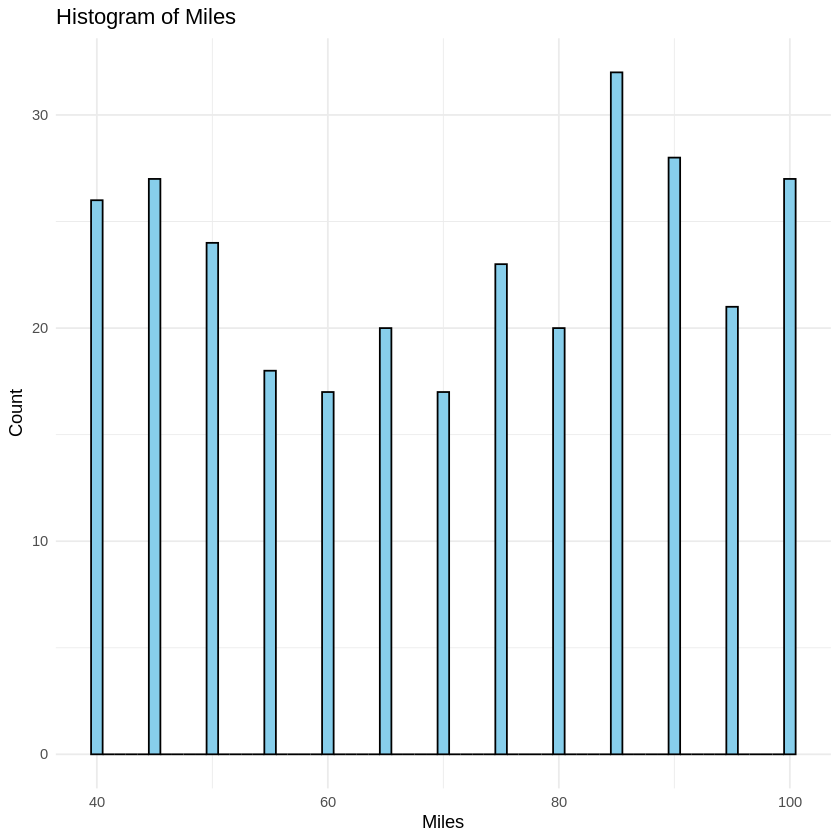

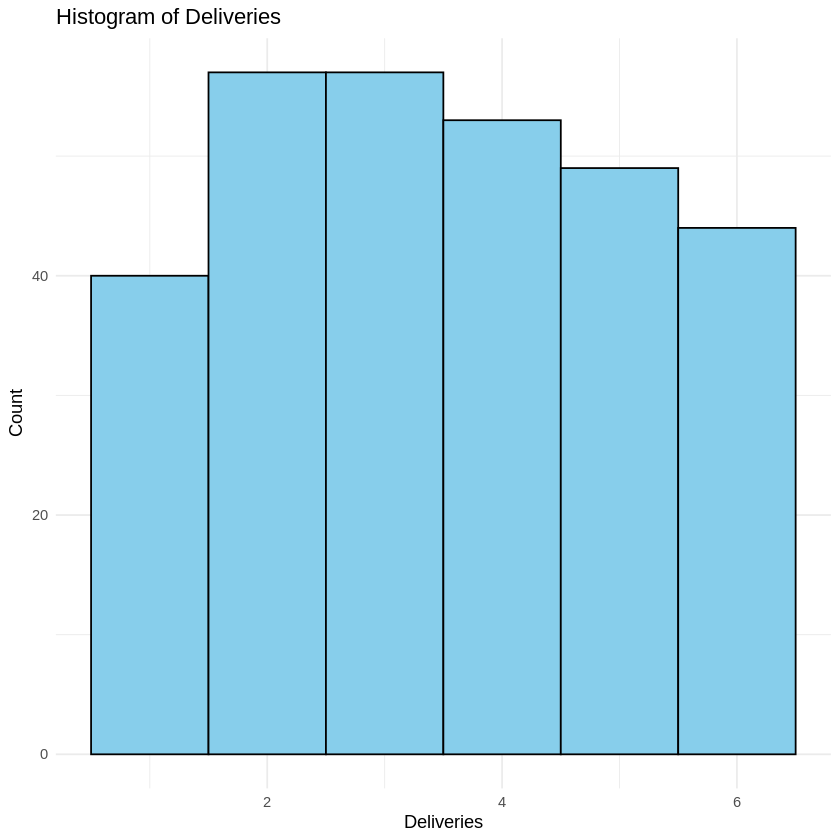

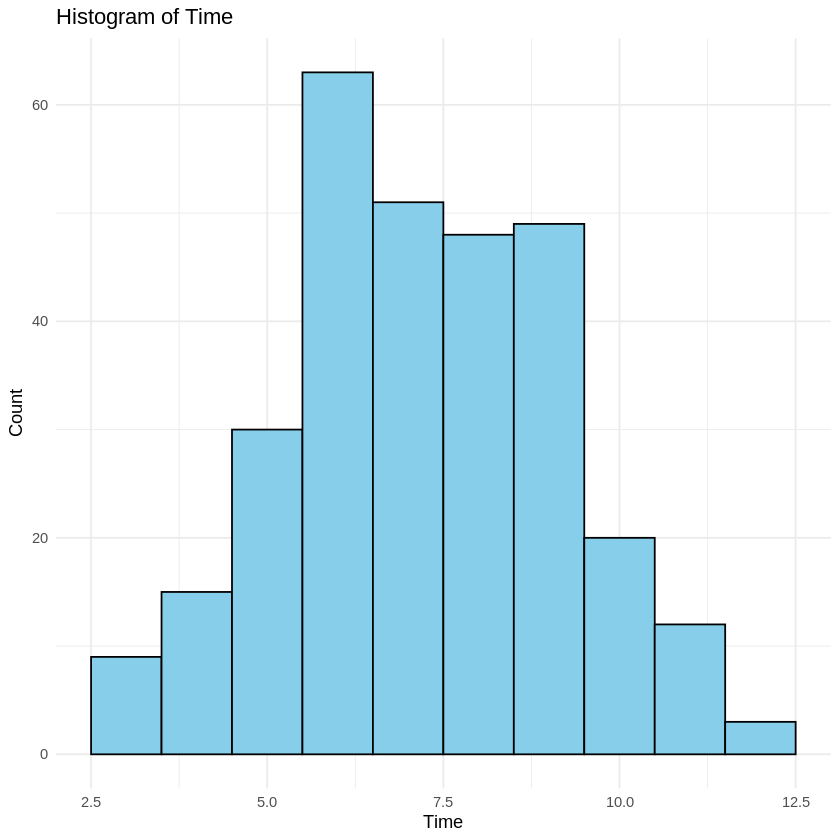

In [12]:
# ================================
# Step-5: Histograms
# ================================

# names(df): returns variable names in df

# ggplot(data, aes_string(x = var))
#   data: the data frame containing your variables (e.g., df)
#   aes_string(): defines aesthetic mappings (axes, color, size, etc.)
#       x = var: maps the x-axis to the variable name stored in the string var
#       y, color, etc. can also be mapped if needed
#
# Returns: a ggplot object to which you can add layers (e.g., geom_histogram, geom_point)

# geom_histogram(binwidth = 1, fill = "skyblue", color = "black")
#   geom_histogram(): adds a histogram layer to a ggplot object
#   binwidth = 1: sets the width of each histogram bin to 1 unit
#   fill = "skyblue": sets the inside color of the bars to sky blue
#   color = "black": sets the border/outline color of the bars to black
#   This layer calculates counts of observations in each bin and plots them as bars

# labs(title = paste("Histogram of", var))
#   labs(): adds labels and titles to a ggplot object
#   title = paste("Histogram of", var): creates a dynamic title
#       - paste(): concatenates text with the variable name stored in var
#       - e.g., if var = "Time", the title becomes "Histogram of Time"
#   Can also add x = "X-axis label", y = "Y-axis label" if desired

# theme_minimal()
#   theme_minimal(): a predefined ggplot2 theme that makes the plot look clean and minimal
#       - removes background gridlines and gray background
#       - simplifies axes and text style

#   -> p: assigns the entire ggplot object (with layers added so far) to the variable p
#       - '->' is the assignment operator in R (same as 'p <- ...')
#   This allows you to manipulate or print the plot later using the variable p

num_vars <- names(df)

# Loop over each column and make a simple histogram
for (i in 1:length(num_vars)) {

  # Get the column name
  var_name <- num_vars[i]

  # Make a histogram
  p1 <- ggplot(df, aes(x = .data[[var_name]])) +  # x-axis is the column
       geom_histogram(binwidth = 1, fill = "skyblue", color = "black") +  # histogram settings
       labs(title = paste("Histogram of", var_name),  # plot title
            x = var_name,  # x-axis label
            y = "Count") + # y-axis label
       theme_minimal()   # clean style

  # Show the plot
  print(p1)
}

# advanced version
# for (var in num_vars) {
#     ggplot(df, aes_string(x = var)) +
#     geom_histogram(binwidth = 1, fill = "skyblue", color = "black") +
#     labs(title = paste("Histogram of", var)) +
#     theme_minimal() -> p1
#     print(p1)
# }

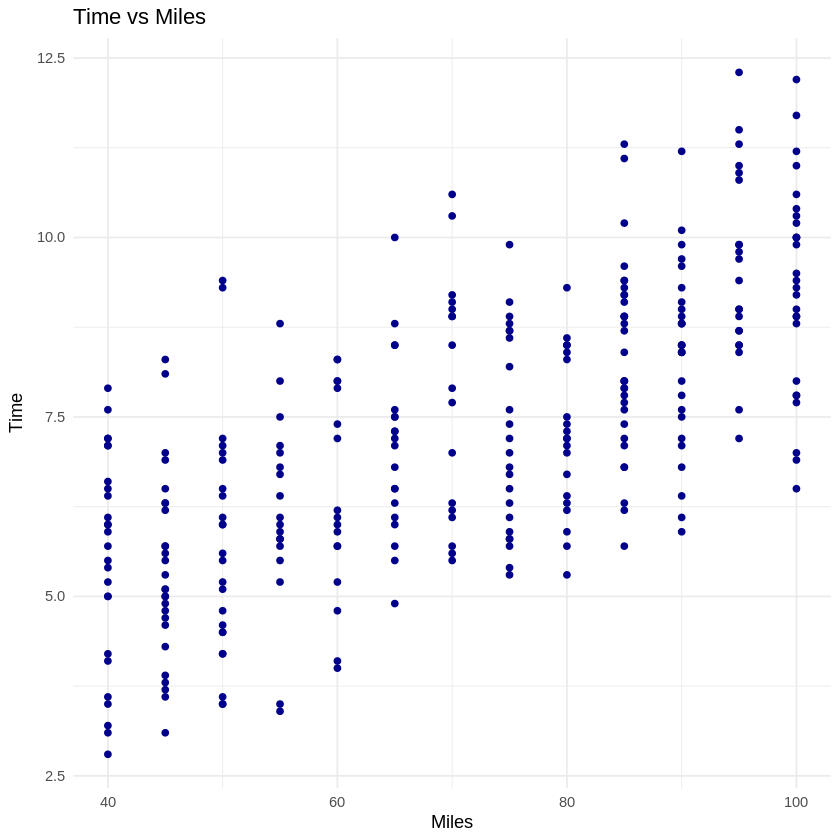

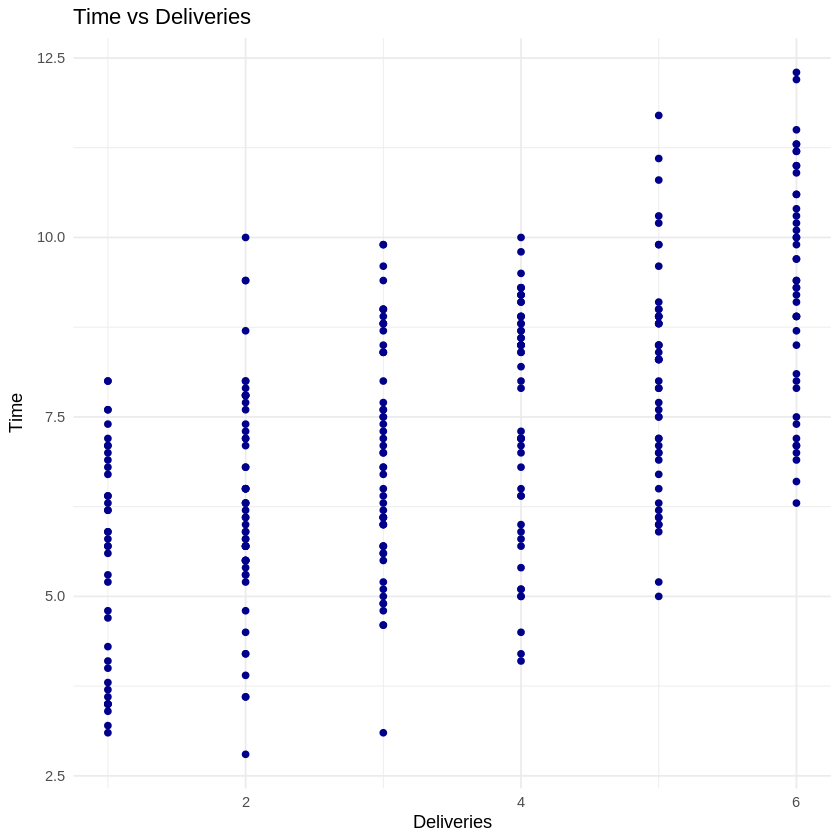

In [13]:
# ================================
# Step-6: Time vs Other Variables
# ================================

# other_vars <- setdiff(names(df), "Time")
#   names(df): returns all column names of the data frame df
#   setdiff(x, y): returns elements in x that are NOT in y
#       Here, it gives all column names except "Time"
#   other_vars: stores all variable names that will be used on the x-axis

# for (var in other_vars) { ... }
#   A for-loop: iterates over each variable name in other_vars
#   var: current variable name in the loop

# ggplot(df, aes(x = var, y = "Time"))
#   ggplot(): initializes a ggplot object
#   data = df: uses df as the dataset
#   aes(): maps aesthetics using variable names as strings
#       x = var: maps current column (from loop) to x-axis
#       y = "Time": maps Time column to y-axis

# geom_point(color = "darkblue")
#   Adds a scatterplot layer to ggplot
#   color = "darkblue": sets the color of points
#   Each point represents one row in df (x = var, y = Time)

other_vars <- setdiff(names(df), "Time")

# Loop over each variable and create scatterplots
for (i in 1:length(other_vars)) {

  # Get the current variable name
  var_name <- other_vars[i]

  # Create scatterplot
  p2 <- ggplot(df, aes(x = .data[[var_name]], y = Time)) +  # map x to current column, y to Time
       geom_point(color = "darkblue") +                     # plot points in dark blue
       labs(title = paste("Time vs", var_name),             # dynamic plot title
            x = var_name,                                   # x-axis label
            y = "Time") +                                   # y-axis label
       theme_minimal()                                       # clean minimal theme

  # Display the plot
  print(p2)
}

# advanced version
# for (var in other_vars) {
#   ggplot(df, aes_string(x = var, y = "Time")) +
#     geom_point(color = "darkblue") +
#     labs(title = paste("Time vs", var)) +
#     theme_minimal() -> p2
#   print(p2)
# }

## [3. Code - Clean V1:](#howCoding2)

[1]  3.486667 70.716667  7.284000
[1]  1.626440 19.557899  1.935501


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


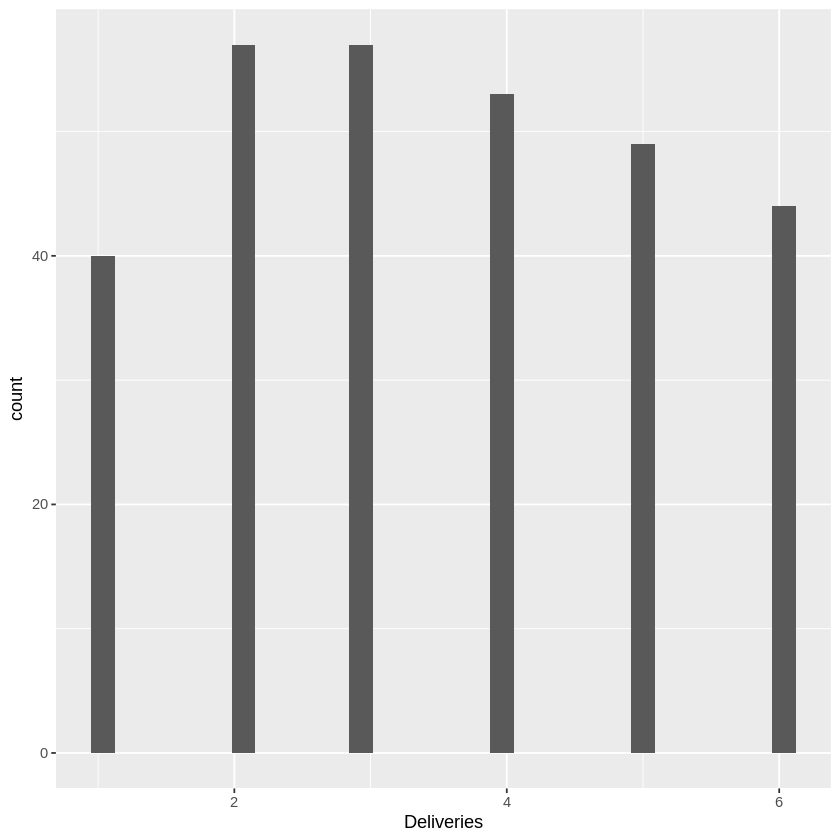

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


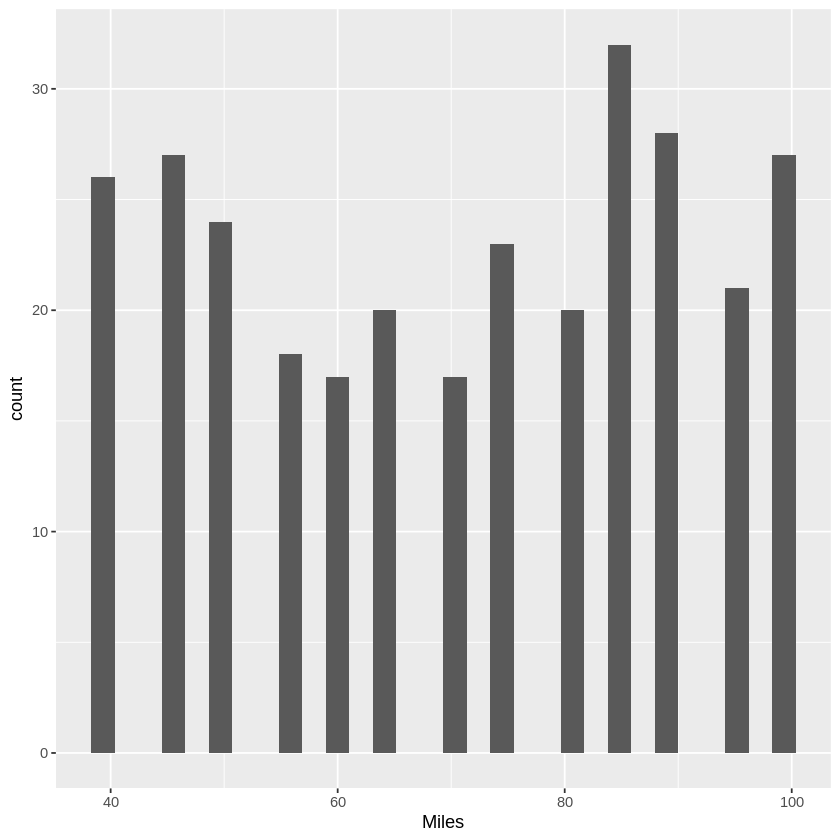

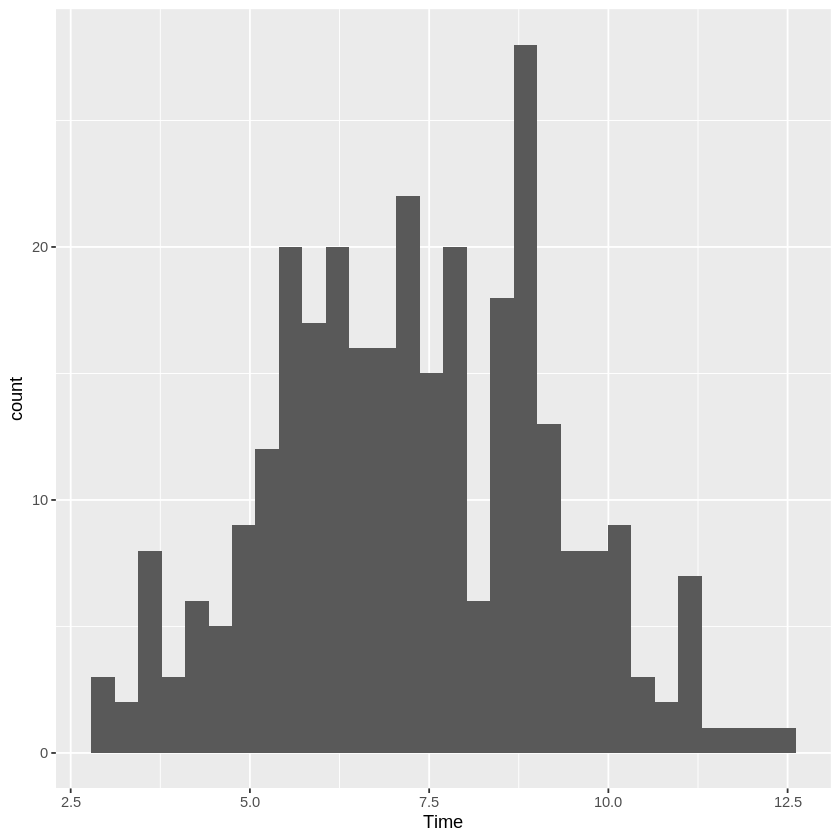

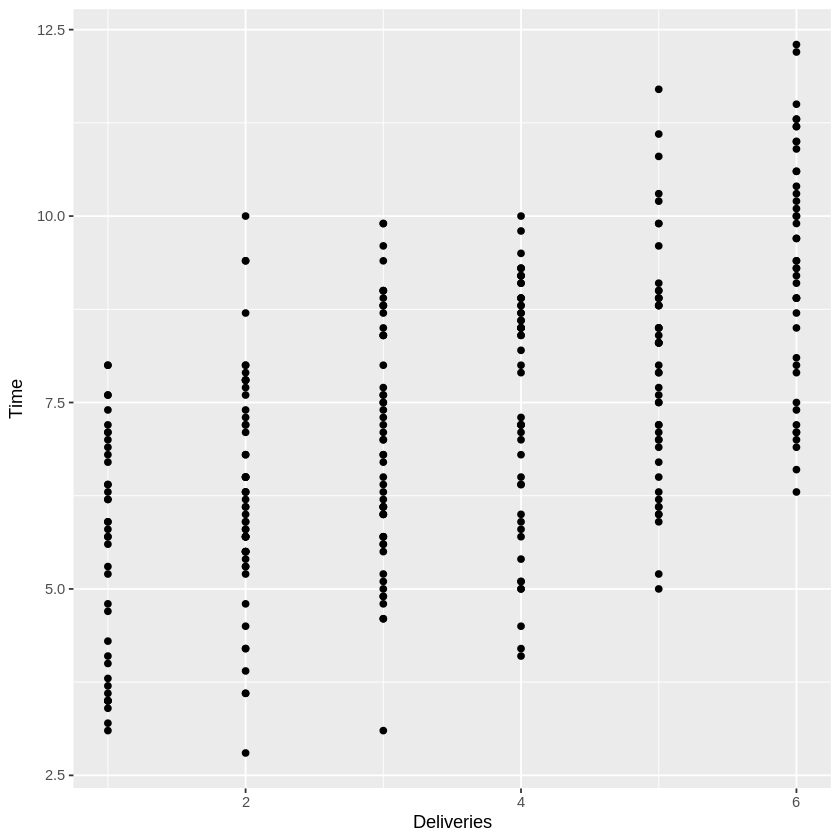

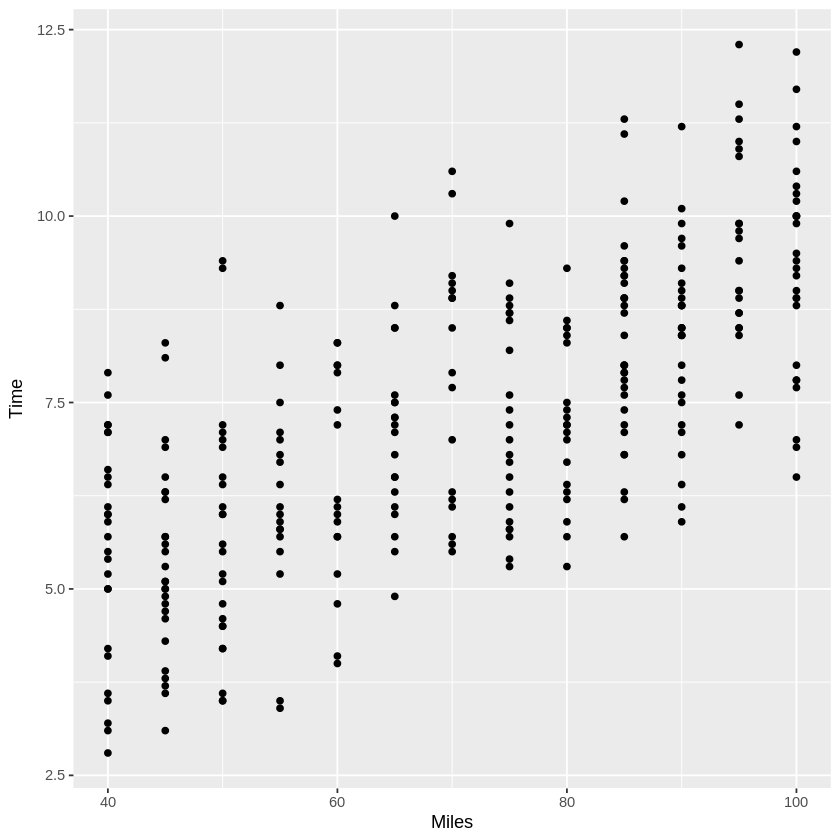

In [29]:
library(tidyverse)
library(readxl)

# ================================
# TO-DO: Upload the data file
# ================================

#
df <- read_excel("ButlerWithDeliveries.xlsx")
df <- df %>% select(-Assignment)

#
mean1 <- mean(df$Deliveries)
mean2 <- mean(df$Miles)
mean3 <- mean(df$Time)
print(c(mean1, mean2, mean3))

#
sd1 <- sd(df$Deliveries)
sd2 <- sd(df$Miles)
sd3 <- sd(df$Time)
print(c(sd1, sd2, sd3))

#
hist1 <- ggplot(df, aes(x = Deliveries)) + geom_histogram()
hist2 <- ggplot(df, aes(x = Miles)) + geom_histogram()
hist3 <- ggplot(df, aes(x = Time)) + geom_histogram()
print(hist1)
print(hist2)
print(hist3)

scatter1 <- ggplot(df, aes(x = Deliveries, y = Time)) + geom_point()
scatter2 <- ggplot(df, aes(x = Miles, y = Time)) + geom_point()
print(scatter1)
print(scatter2)


## [4. Code - Clean V2:](#howCoding2)


-----The Means:-----
    Variable      Mean
1      Miles 70.716667
2 Deliveries  3.486667
3       Time  7.284000

-----The Sds:-----
    Variable      Mean
1      Miles 19.557899
2 Deliveries  1.626440
3       Time  1.935501


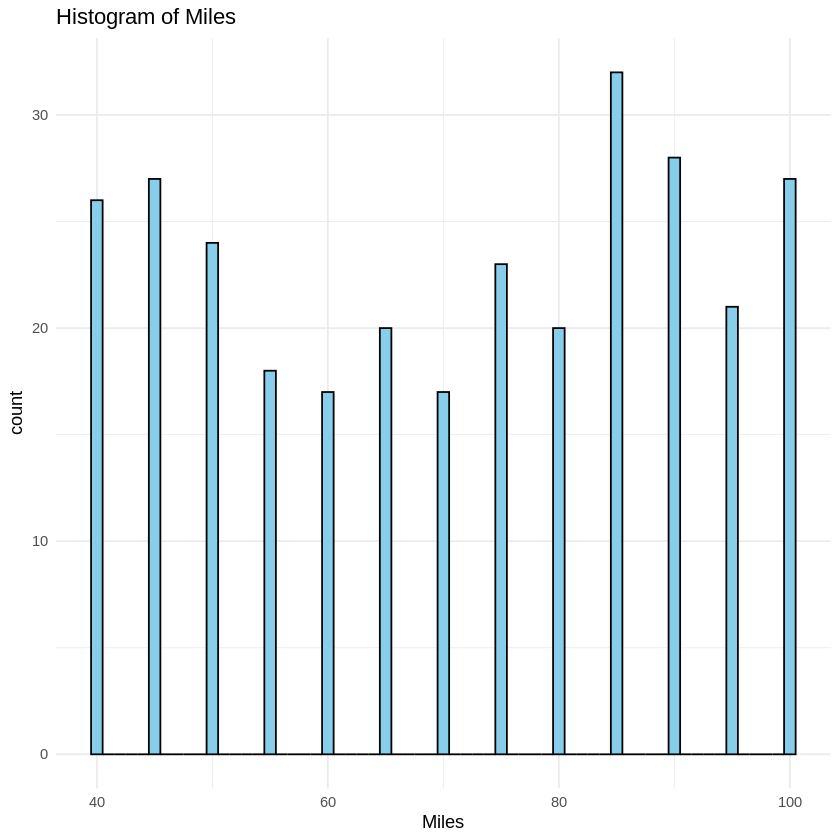

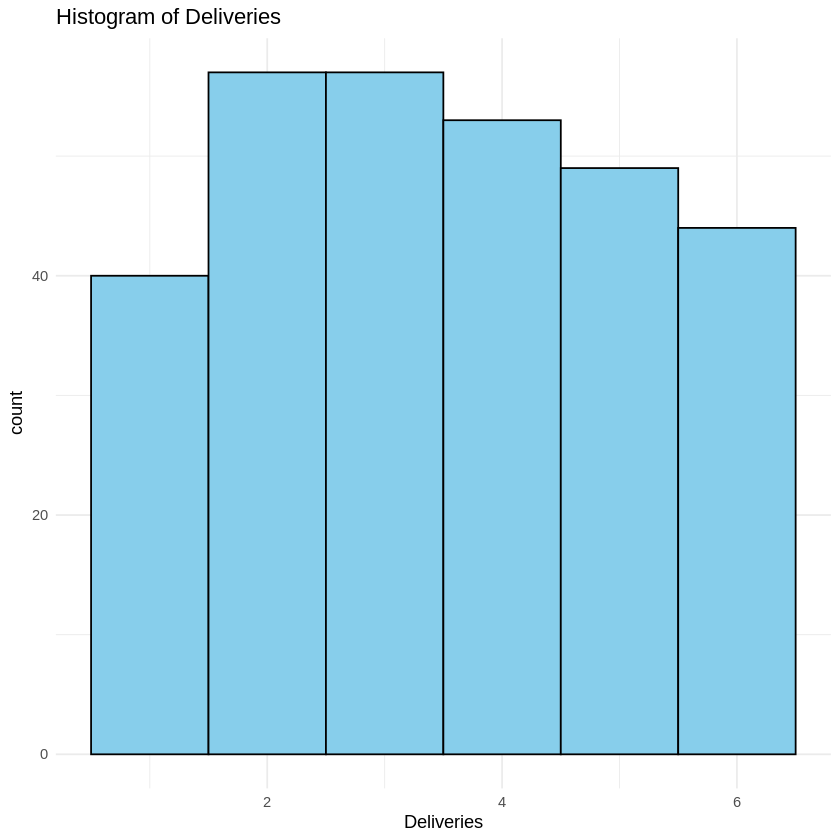

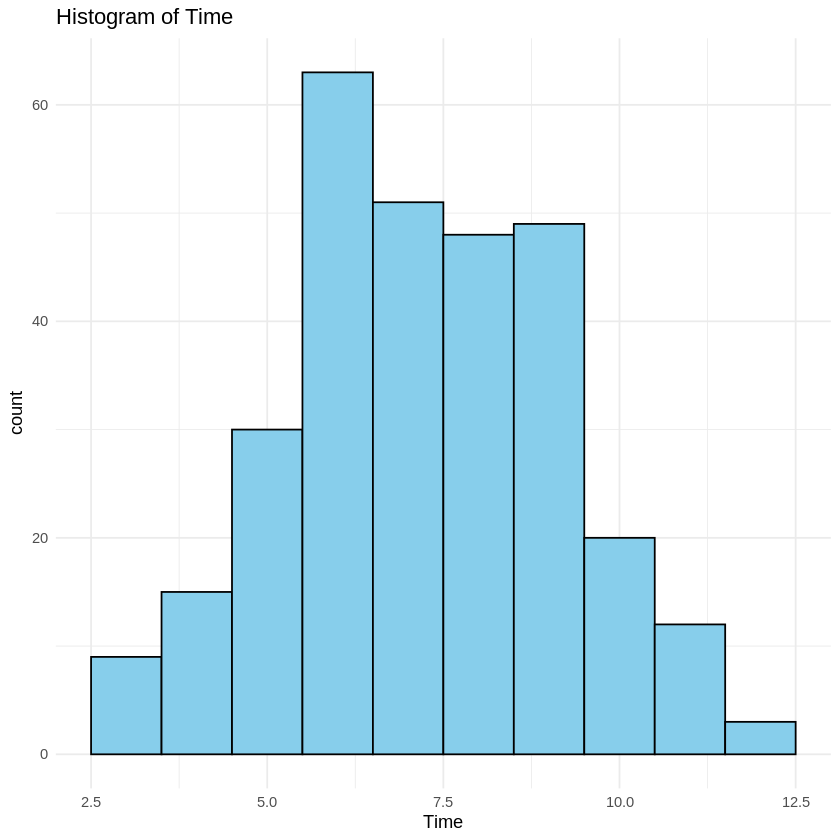

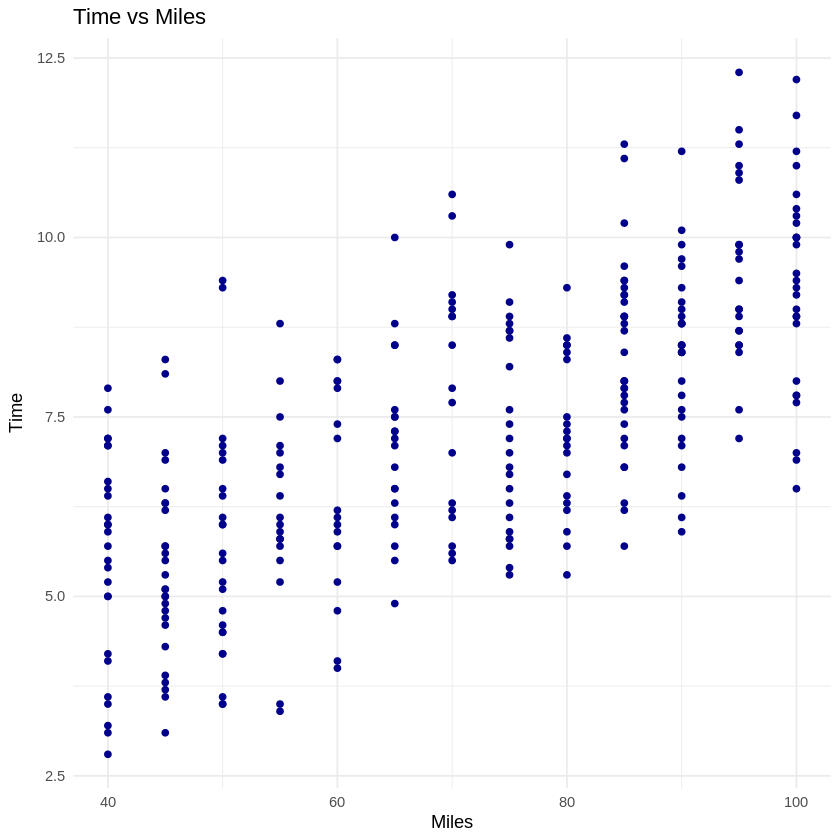

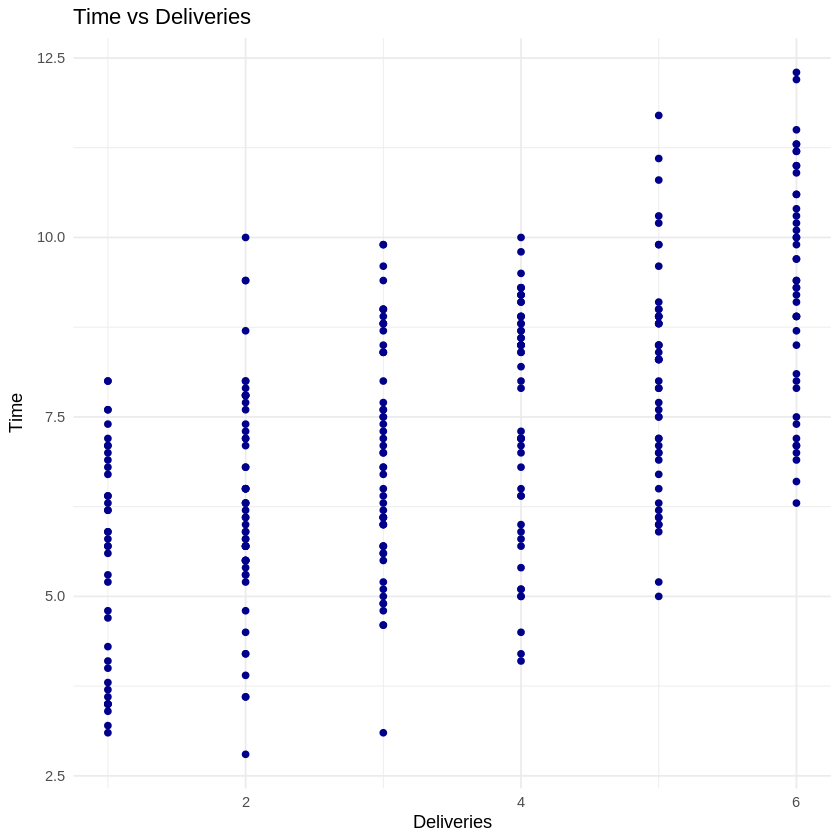

In [31]:
library(tidyverse)
library(readxl)

# ================================
# TO-DO: Upload the data file
# ================================

#
df <- read_excel("ButlerWithDeliveries.xlsx")
df <- df %>% select(-Assignment)

#
means <- sapply(df, mean, na.rm = TRUE)
sds   <- sapply(df, sd, na.rm = TRUE)

#
num_vars <- names(df)
other_vars <- setdiff(names(df), "Time")

#
means_table <- data.frame(
  Variable = names(means),  # column names
  Mean = as.numeric(means)  # mean values
)

#
sds_table <- data.frame(
  Variable = names(sds),  # column names
  Mean = as.numeric(sds)  # mean values
)


#
cat("\n-----The Means:-----\n")
print(means_table)

#
cat("\n-----The Sds:-----\n")
print(sds_table)

#
for (var in num_vars) {
    p1 <- ggplot(df, aes(x = .data[[var]])) +
    geom_histogram(binwidth = 1, fill = "skyblue", color = "black") +
    labs(title = paste("Histogram of", var)) +
    theme_minimal()
    print(p1)
}

#
for (var_name in other_vars) {
    ggplot(df, aes(x = .data[[var_name]], y = Time)) +
    geom_point(color = "darkblue") +
    labs(title = paste("Time vs", var_name)) +
    theme_minimal() -> p2
    print(p2)
}
